# Make GWP figures

To run this notebook, the GWP notebook must first be run.

In [1]:
filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
from matplotlib import gridspec
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))
plt.rcParams['figure.dpi'] = 300

## Hydrogen GWP
We read in and plot the GWP values of hydrogen through changes in methane lifetime, changes in ozone concentration both directly from hydrogen reactions and indirectly from methane changes, and changes in stratospheric water vapour, also both from direct production from hydrogen and induced via changes in methane concentrations. Bar plots show how the various contributions contribute to the total GWP value in each of the sensitivity test.

In [3]:
tittel = 'H2 GWP'
ytittel ='GWP'

default_size = 18*2 #18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=16*2)    # legend fontsize
plt.rc('figure', titlesize=default_size)

#Defining some colors:
CH4_color = "lightseagreen"
O3_color = "gold"
H2O_color = "darkviolet"
H2_color = 'lightblue'

#Defining some legend looks:
CH4_legend = mpatches.Patch( facecolor=CH4_color,label='CH4')
O3_legend= mpatches.Patch( facecolor=O3_color, label='O3')
H2O_legend= mpatches.Patch( facecolor=H2O_color, label='strat H2O')
CH4ind_legend = mpatches.Patch(facecolor='White',hatch='\\\\', label='CH4 induced')

In [4]:
sorted_list = ['antro1', 
               'H2_avi',
               'SSP119', 
               'SSP434', 
               'SSP585'] 

In [5]:
rename_list = {'antro01':'anthro01', 
               'antro1':'anthro1', 
               'antro10':'anthro10',
               'antro100':'anthro100'}

In [6]:
df_table_gwp = pd.read_csv(filepath+'table_h2_gwp.csv',index_col=0)
df_table_gwp

,antro1,H2_avi,SSP119,SSP434,SSP585
O3,2.41,2.51,2.48,2.05,2.01
strat H2O,NaN,NaN,1.95,1.96,1.92
O3 CH4ind,2.82,2.98,2.94,2.79,3.03
strat H2O CH4ind,0.66,0.70,0.73,0.79,0.83
CH4dir,3.30,3.48,3.18,3.18,3.43
CH4indir,1.53,1.62,1.64,2.26,2.31


In [7]:
#Sort indexes
df_table_gwp = df_table_gwp.reindex(['CH4dir','CH4indir', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind'])

In [8]:
#Sort columns
df_table_gwp = df_table_gwp.reindex(sorted_list,axis=1)

In [9]:
#Rename antro -> anthro
df_table_gwp.rename(columns=rename_list, inplace=True)
df_table_gwp

,anthro1,H2_avi,SSP119,SSP434,SSP585
CH4dir,3.30,3.48,3.18,3.18,3.43
CH4indir,1.53,1.62,1.64,2.26,2.31
O3,2.41,2.51,2.48,2.05,2.01
O3 CH4ind,2.82,2.98,2.94,2.79,3.03
strat H2O,NaN,NaN,1.95,1.96,1.92
strat H2O CH4ind,0.66,0.70,0.73,0.79,0.83


In [10]:
#Combine methane induced and direct contributions:
df_table_gwp_simple = df_table_gwp.fillna(0.0)
df_table_gwp_simple.loc['CH4'] = df_table_gwp_simple.loc['CH4dir']+df_table_gwp_simple.loc['CH4indir']
df_table_gwp_simple.loc['O3'] = df_table_gwp_simple.loc['O3 CH4ind']+df_table_gwp_simple.loc['O3']
df_table_gwp_simple.loc['strat H2O'] = df_table_gwp_simple.loc['strat H2O']+df_table_gwp_simple.loc['strat H2O CH4ind']


df_table_gwp_simple.replace(0, np.nan, inplace=True)
df_table_gwp_simple = df_table_gwp_simple.drop(['CH4dir','CH4indir','strat H2O CH4ind','O3 CH4ind'])
df_table_gwp_simple

,anthro1,H2_avi,SSP119,SSP434,SSP585
O3,5.23,5.49,5.42,4.84,5.04
strat H2O,0.66,0.70,2.68,2.75,2.74
CH4,4.83,5.10,4.82,5.44,5.74


In [11]:
#Calculate relative contributions of the methane induced:
df_gwp_table_to_manuscript = pd.DataFrame(columns=['CH4','CH4 ind [%]','O3','O3 CH4ind [%]','Strat H2O','Strat H2O CH4ind [%]'], index=df_table_gwp.columns)

df_gwp_table_to_manuscript['CH4'] = df_table_gwp.loc['CH4dir']+df_table_gwp.loc['CH4indir']
df_gwp_table_to_manuscript['CH4 ind [%]'] = df_table_gwp.loc['CH4indir']/df_gwp_table_to_manuscript['CH4']*100.0
df_gwp_table_to_manuscript['O3'] = df_table_gwp.loc['O3 CH4ind']+df_table_gwp.loc['O3']
df_gwp_table_to_manuscript['Strat H2O'] = df_table_gwp.loc['strat H2O']+df_table_gwp.loc['strat H2O CH4ind']
df_gwp_table_to_manuscript['O3 CH4ind [%]'] = df_table_gwp.loc['O3 CH4ind']/df_gwp_table_to_manuscript['O3']*100.0
df_gwp_table_to_manuscript['Strat H2O CH4ind [%]'] = df_table_gwp.loc['strat H2O CH4ind']/df_gwp_table_to_manuscript['Strat H2O']*100.0
df_gwp_table_to_manuscript[['O3 CH4ind [%]','CH4 ind [%]','Strat H2O CH4ind [%]']].to_csv('output/methane_ind_contribution.csv')
df_gwp_table_to_manuscript[['O3 CH4ind [%]','CH4 ind [%]','Strat H2O CH4ind [%]']]

,O3 CH4ind [%],CH4 ind [%],Strat H2O CH4ind [%]
anthro1,53.9,31.7,NaN
H2_avi,54.2,31.7,NaN
SSP119,54.2,34.0,27.2
SSP434,57.7,41.6,28.7
SSP585,60.2,40.3,30.2


In [12]:
df_gwp_table_to_manuscript= df_table_gwp_simple.T
df_gwp_table_to_manuscript['Total'] = df_gwp_table_to_manuscript[['CH4','O3','strat H2O']].sum(axis=1)
df_gwp_table_to_manuscript

,O3,strat H2O,CH4,Total
anthro1,5.23,0.66,4.83,10.7
H2_avi,5.49,0.70,5.10,11.3
SSP119,5.42,2.68,4.82,12.9
SSP434,4.84,2.75,5.44,13.0
SSP585,5.04,2.74,5.74,13.5


Write some numbers to be used in the manuscript

In [13]:
#df_gwp_table_to_manuscript['Total'].loc[['anthro01','anthro1','anthro10','anthro100']].max()

In [14]:
#df_gwp_table_to_manuscript['Total'].loc[['anthro01','anthro1','anthro10','anthro100']].min()

In [15]:
#df_gwp_table_to_manuscript['Total'].loc['anthro1']

In [16]:
#df_gwp_table_to_manuscript['Total'].loc[['nemo', 'epia', 'munich','usdrydep', 'maud', 'zep', 'maxdep']].min()

In [17]:
#df_gwp_table_to_manuscript['Total'].loc[['nemo', 'epia', 'munich','usdrydep', 'maud', 'zep', 'maxdep']].max()

In [18]:
#df_gwp_table_to_manuscript['Total'].loc[['nemo', 'epia', 'munich','usdrydep', 'maud', 'zep', 'maxdep']].max() - df_gwp_table_to_manuscript['Total'].loc[['nemo', 'epia', 'munich','usdrydep', 'maud', 'zep', 'maxdep']].min()

In [19]:
#Table with relative contributions to total GWP (direct and indirect effects combined):
df_gwp_table_relative = df_gwp_table_to_manuscript.div(df_gwp_table_to_manuscript['Total'],axis=0)*100.0
df_gwp_table_relative.drop('Total',axis=1).to_csv('output/gwp100_table_relative.csv')
df_gwp_table_relative

,O3,strat H2O,CH4,Total
anthro1,48.8,6.15,45.0,100
H2_avi,48.6,6.17,45.2,100
SSP119,42.0,20.8,37.3,100
SSP434,37.1,21.1,41.8,100
SSP585,37.3,20.3,42.5,100


In [20]:

df_gwp_table_to_manuscript= df_table_gwp.T
df_gwp_table_to_manuscript['Total']=df_gwp_table_to_manuscript[['CH4dir','CH4indir', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind']].sum(axis=1)
df_gwp_table_to_manuscript

,CH4dir,CH4indir,O3,O3 CH4ind,strat H2O,strat H2O CH4ind,Total
anthro1,3.30,1.53,2.41,2.82,NaN,0.66,10.7
H2_avi,3.48,1.62,2.51,2.98,NaN,0.70,11.3
SSP119,3.18,1.64,2.48,2.94,1.95,0.73,12.9
SSP434,3.18,2.26,2.05,2.79,1.96,0.79,13.0
SSP585,3.43,2.31,2.01,3.03,1.92,0.83,13.5


In [21]:
df_gwp_rel_antro1 = df_gwp_table_to_manuscript['Total'].div(df_gwp_table_to_manuscript['Total'].loc['anthro1'])
df_gwp_rel_antro1

anthro1   1.00
H2_avi    1.05
SSP119    1.20
SSP434    1.21
SSP585    1.26
Name: Total, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'anthro1'),
  Text(1, 0, 'H2_avi'),
  Text(2, 0, 'SSP119'),
  Text(3, 0, 'SSP434'),
  Text(4, 0, 'SSP585')])

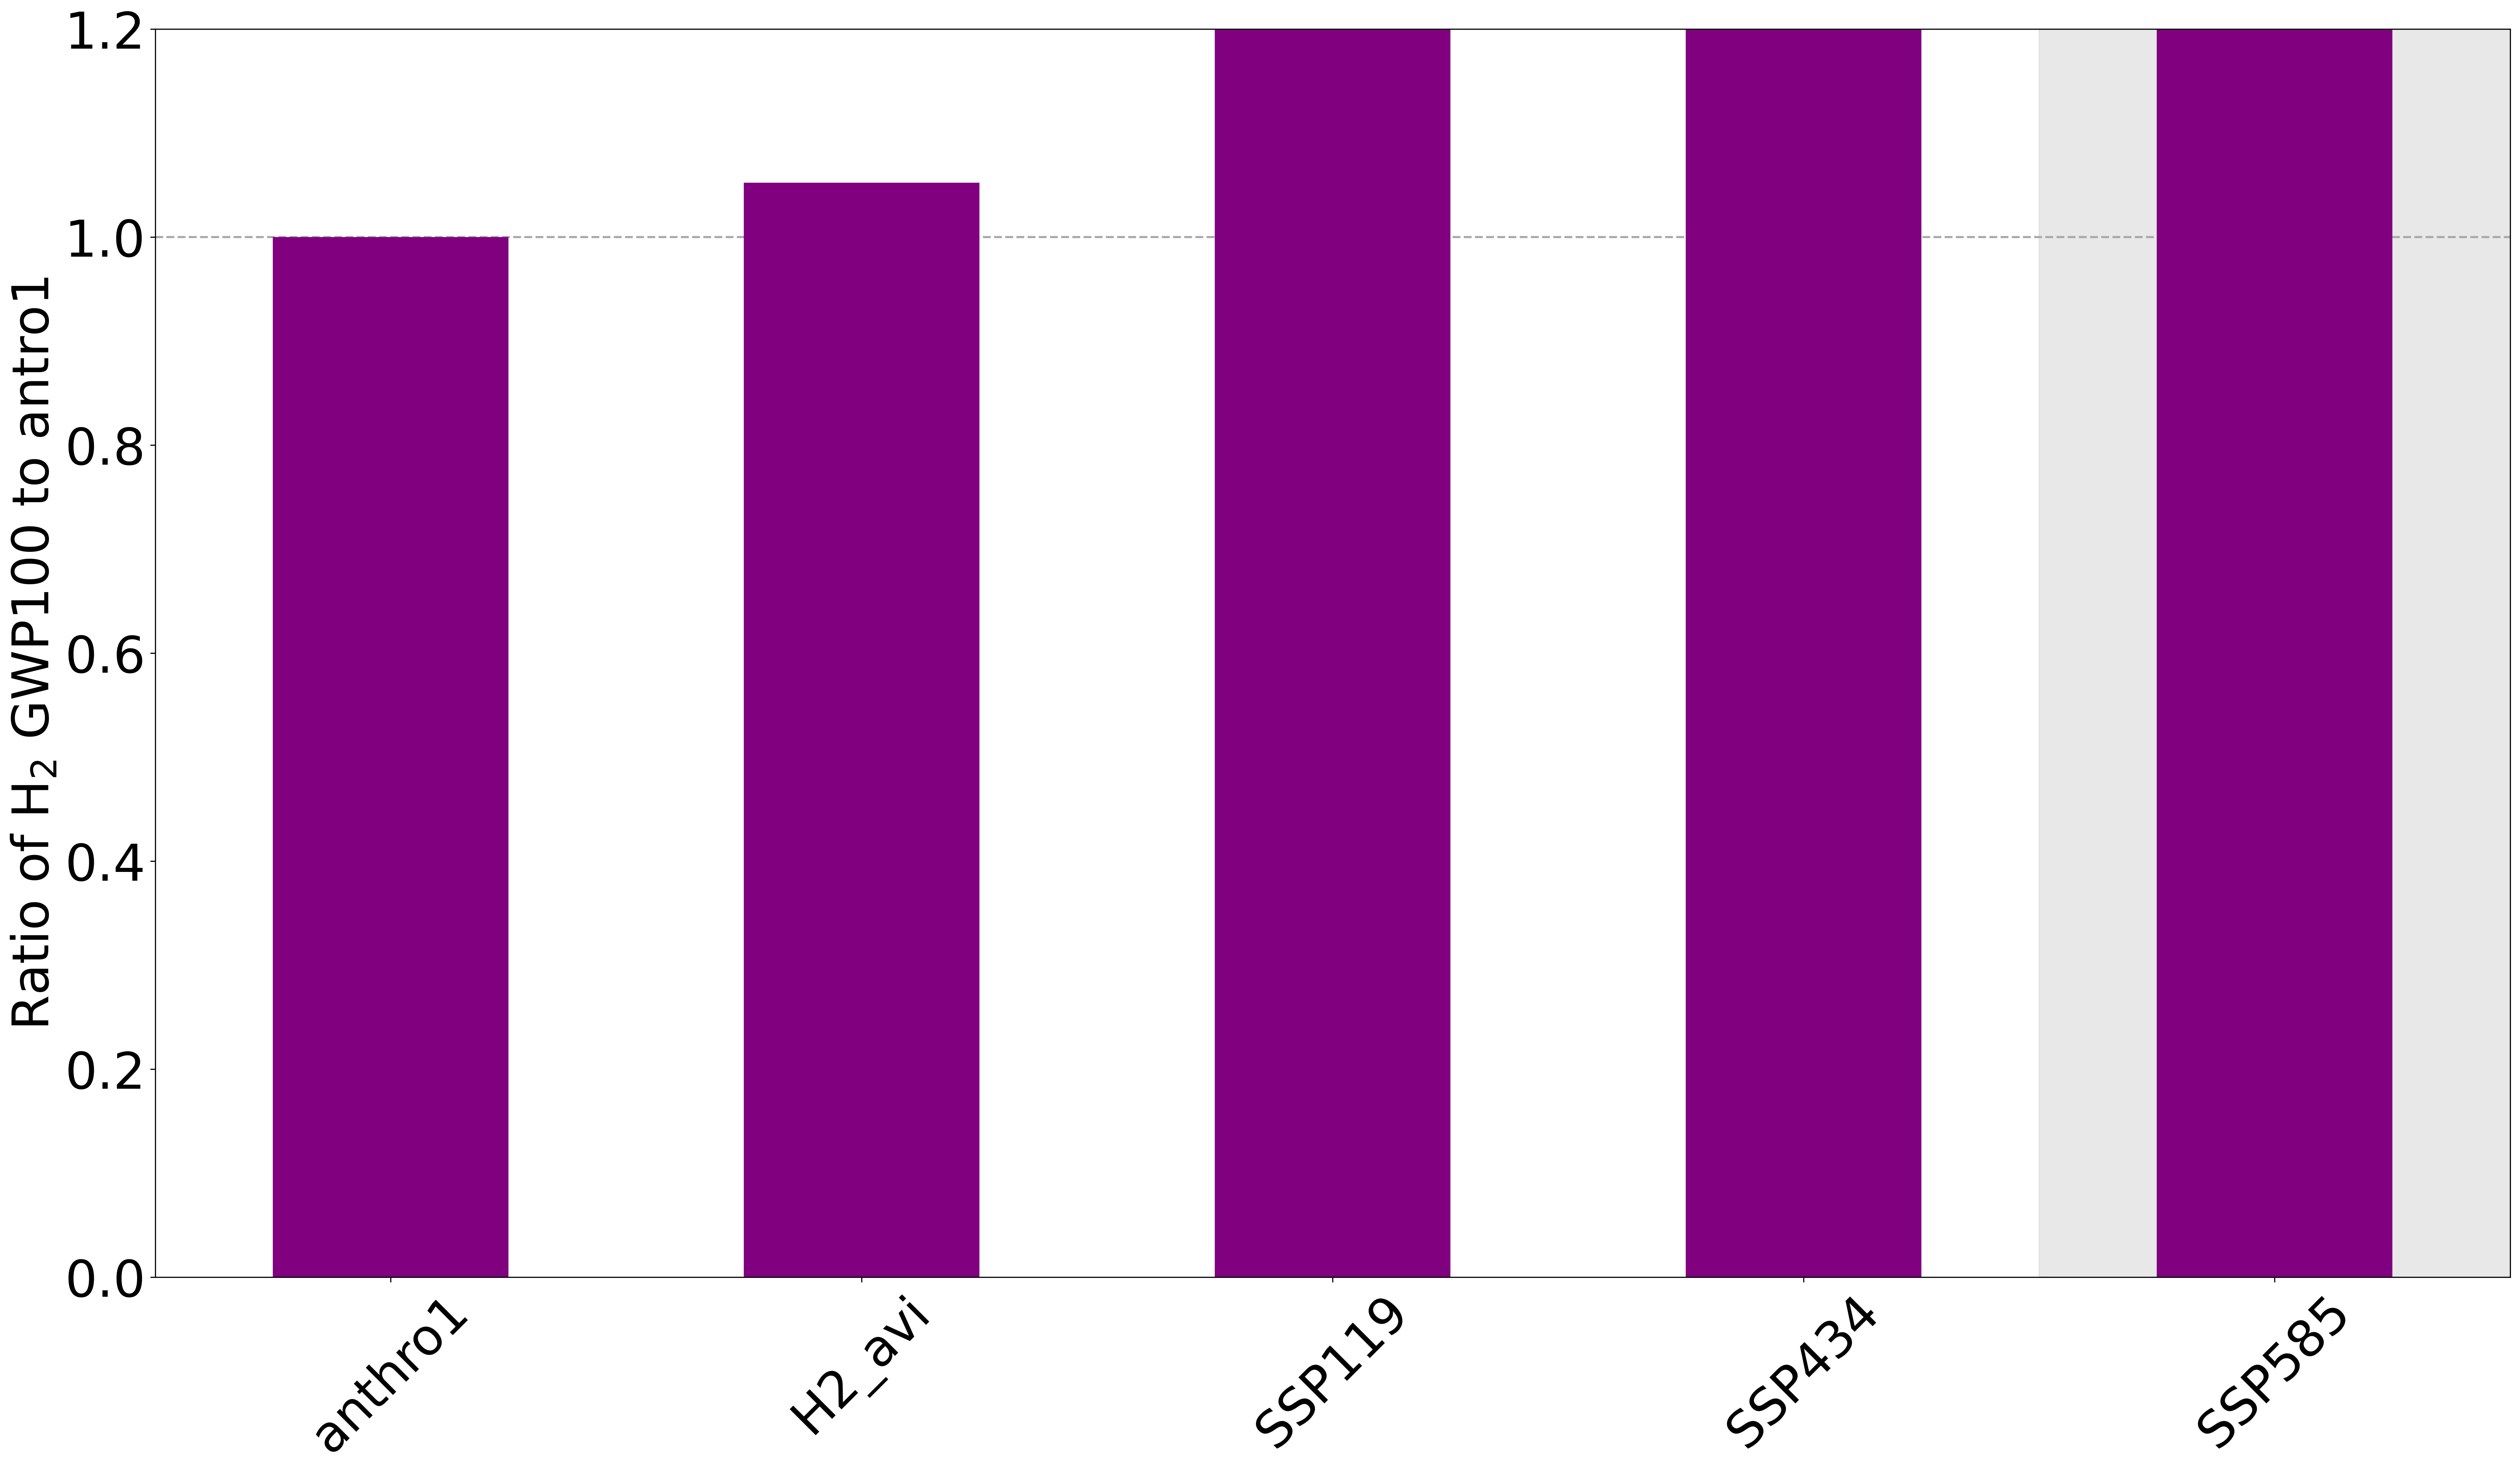

In [22]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15*2,8*2),sharey=True)
df_gwp_rel_antro1.plot.bar(ax=axs,color='purple')
axs.axhline(y=1,zorder=-5,color='darkgray',linestyle='--')
axs.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)
axs.set_ylim([0,1.2])
axs.set_ylabel('Ratio of H$_2$ GWP100 to antro1')
plt.xticks(rotation = 45)

Figure with deviation from anthro1 presented in [%]

In [23]:
df_gwp_diff_antro1 = df_gwp_table_to_manuscript['Total'].sub(df_gwp_table_to_manuscript['Total'].loc['anthro1'])
df_gwp_diff_antro1

anthro1   0.00
H2_avi    0.56
SSP119    2.19
SSP434    2.30
SSP585    2.80
Name: Total, dtype: float64

In [24]:
df_gwp_pros_antro1 = df_gwp_diff_antro1.div(df_gwp_table_to_manuscript['Total'].loc['anthro1'])*100.0
df_gwp_pros_antro1

anthro1   0.00
H2_avi    5.25
SSP119    20.5
SSP434    21.5
SSP585    26.2
Name: Total, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'anthro1'),
  Text(1, 0, 'H2_avi'),
  Text(2, 0, 'SSP119'),
  Text(3, 0, 'SSP434'),
  Text(4, 0, 'SSP585')])

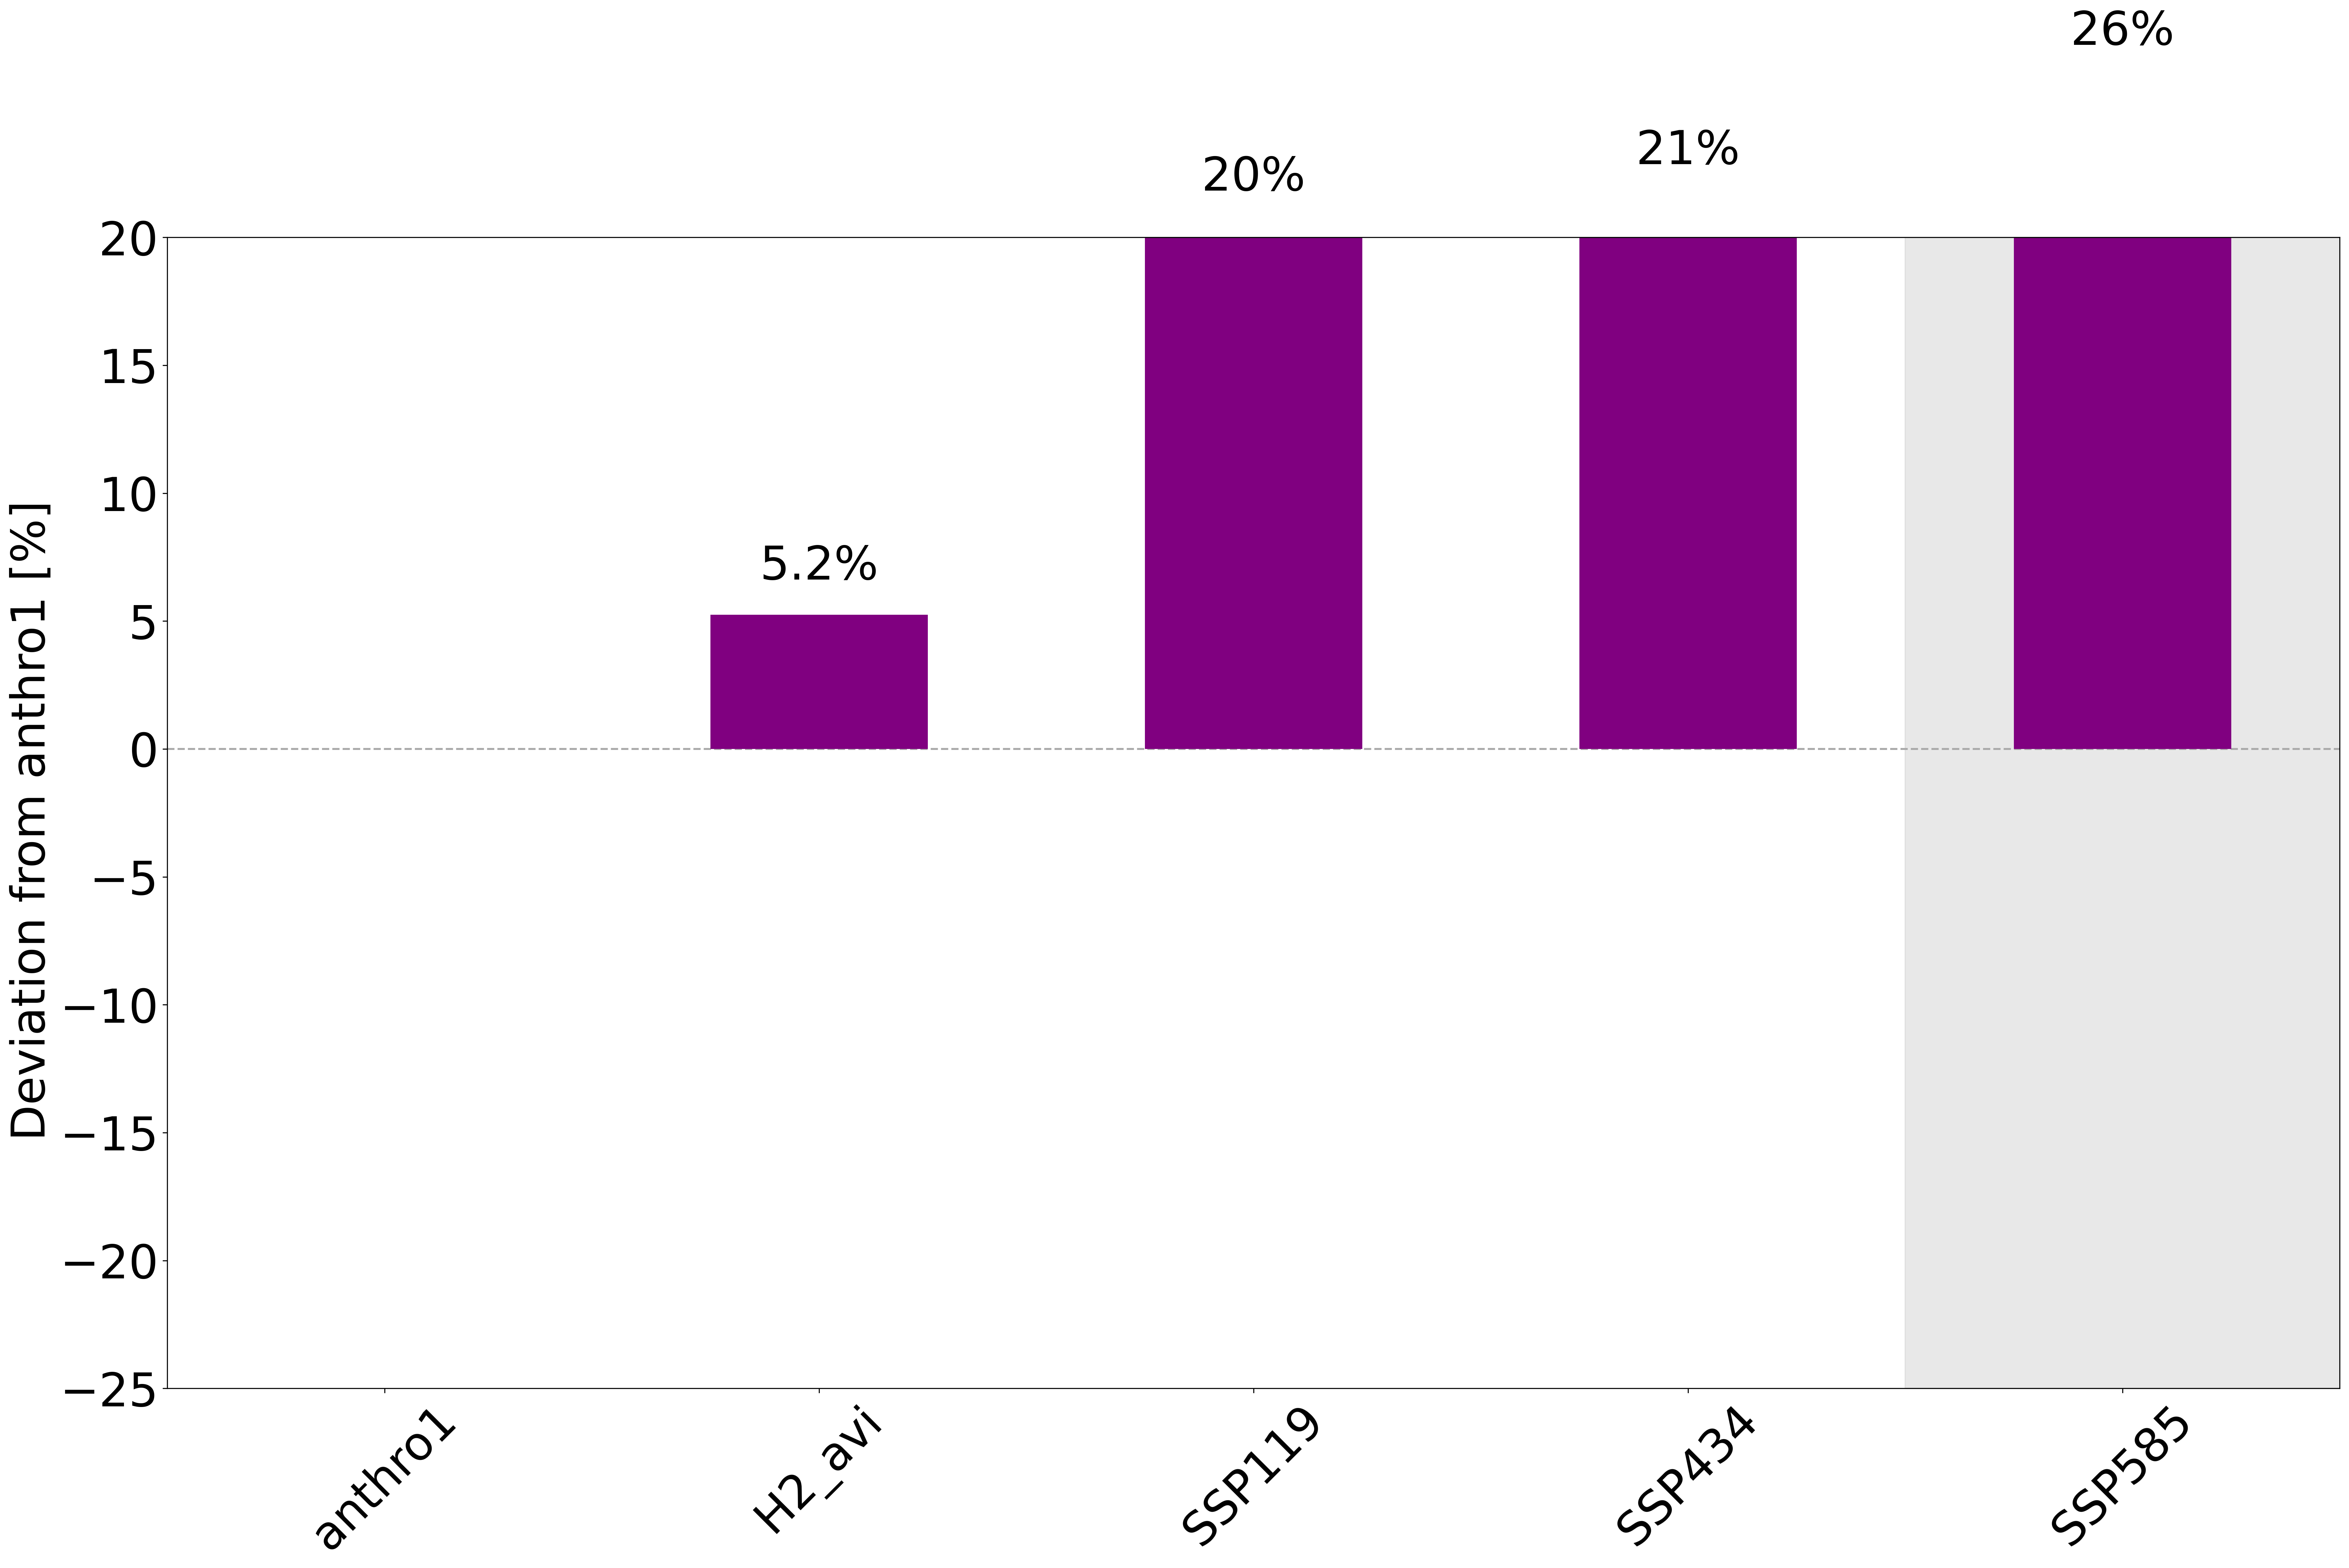

In [25]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15*2,8*2),sharey=True)

df_gwp_pros_antro1.plot.bar(ax=axs,color='purple')

axs.axhline(y=0,zorder=-5,color='darkgray',linestyle='--')
axs.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)


        
for c,col in enumerate(df_gwp_pros_antro1.index):
    value = df_gwp_pros_antro1.loc[col]
    if value < 0:
        add = -1.0
        va = 'top'
    else:
        add = 1.0
        va = 'bottom'
    if abs(value) < 10 and abs(value) > 2 : 
        axs.text(c,value+add, '{:.1f}'.format(value)+'%',ha='center', va=va)
    if abs(value) >= 10:
        axs.text(c,value+add, '{:.0f}'.format(value)+'%',ha='center', va=va)
 
axs.set_ylim([-25,20])
axs.set_ylabel('Deviation from anthro1 [%] ') #of H$_2$ GWP100 to antro1')
plt.xticks(rotation = 45)

In [26]:
df_table_gwp=df_table_gwp.sort_index()
df_table_gwp

,anthro1,H2_avi,SSP119,SSP434,SSP585
CH4dir,3.30,3.48,3.18,3.18,3.43
CH4indir,1.53,1.62,1.64,2.26,2.31
O3,2.41,2.51,2.48,2.05,2.01
O3 CH4ind,2.82,2.98,2.94,2.79,3.03
strat H2O,NaN,NaN,1.95,1.96,1.92
strat H2O CH4ind,0.66,0.70,0.73,0.79,0.83


In [27]:
#https://raw.githubusercontent.com/ciceroOslo/Hydrogen_GWP/main/output/table_to_manuscript_h2_gwp100.csv
mm_complist = ['CH4','O3','strat H2O','Total']
mm_mean = [5.09317311858071,4.420352503539686,2.1076685325801683,11.621194154700564]
sand_etal_mm = pd.DataFrame(data=[mm_mean],index=['Sand et al. 2023'],columns=mm_complist)
sand_etal_mm

,CH4,O3,strat H2O,Total
Sand et al. 2023,5.09,4.42,2.11,11.6


In [28]:
df_table_gwp['Sand et al. 2023'] = 0.0
comp_list = ['CH4','O3','strat H2O']
 
df_table_gwp['Sand et al. 2023'].loc['CH4dir'] = sand_etal_mm['CH4'].loc['Sand et al. 2023']
df_table_gwp['Sand et al. 2023'].loc['O3'] = sand_etal_mm['O3'].loc['Sand et al. 2023']
df_table_gwp['Sand et al. 2023'].loc['strat H2O'] = sand_etal_mm['strat H2O'].loc['Sand et al. 2023']
df_table_gwp


/tmp/ipykernel_2981/2133649065.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_table_gwp['Sand et al. 2023'].loc['CH4dir'] = sand_etal_mm['CH4'].loc['Sand et al. 2023']
/tmp/ipykernel_2981/2133649065.py:5: FutureWarning: ChainedAssign

,anthro1,H2_avi,SSP119,SSP434,SSP585,Sand et al. 2023
CH4dir,3.30,3.48,3.18,3.18,3.43,5.09
CH4indir,1.53,1.62,1.64,2.26,2.31,0.00
O3,2.41,2.51,2.48,2.05,2.01,4.42
O3 CH4ind,2.82,2.98,2.94,2.79,3.03,0.00
strat H2O,NaN,NaN,1.95,1.96,1.92,2.11
strat H2O CH4ind,0.66,0.70,0.73,0.79,0.83,0.00


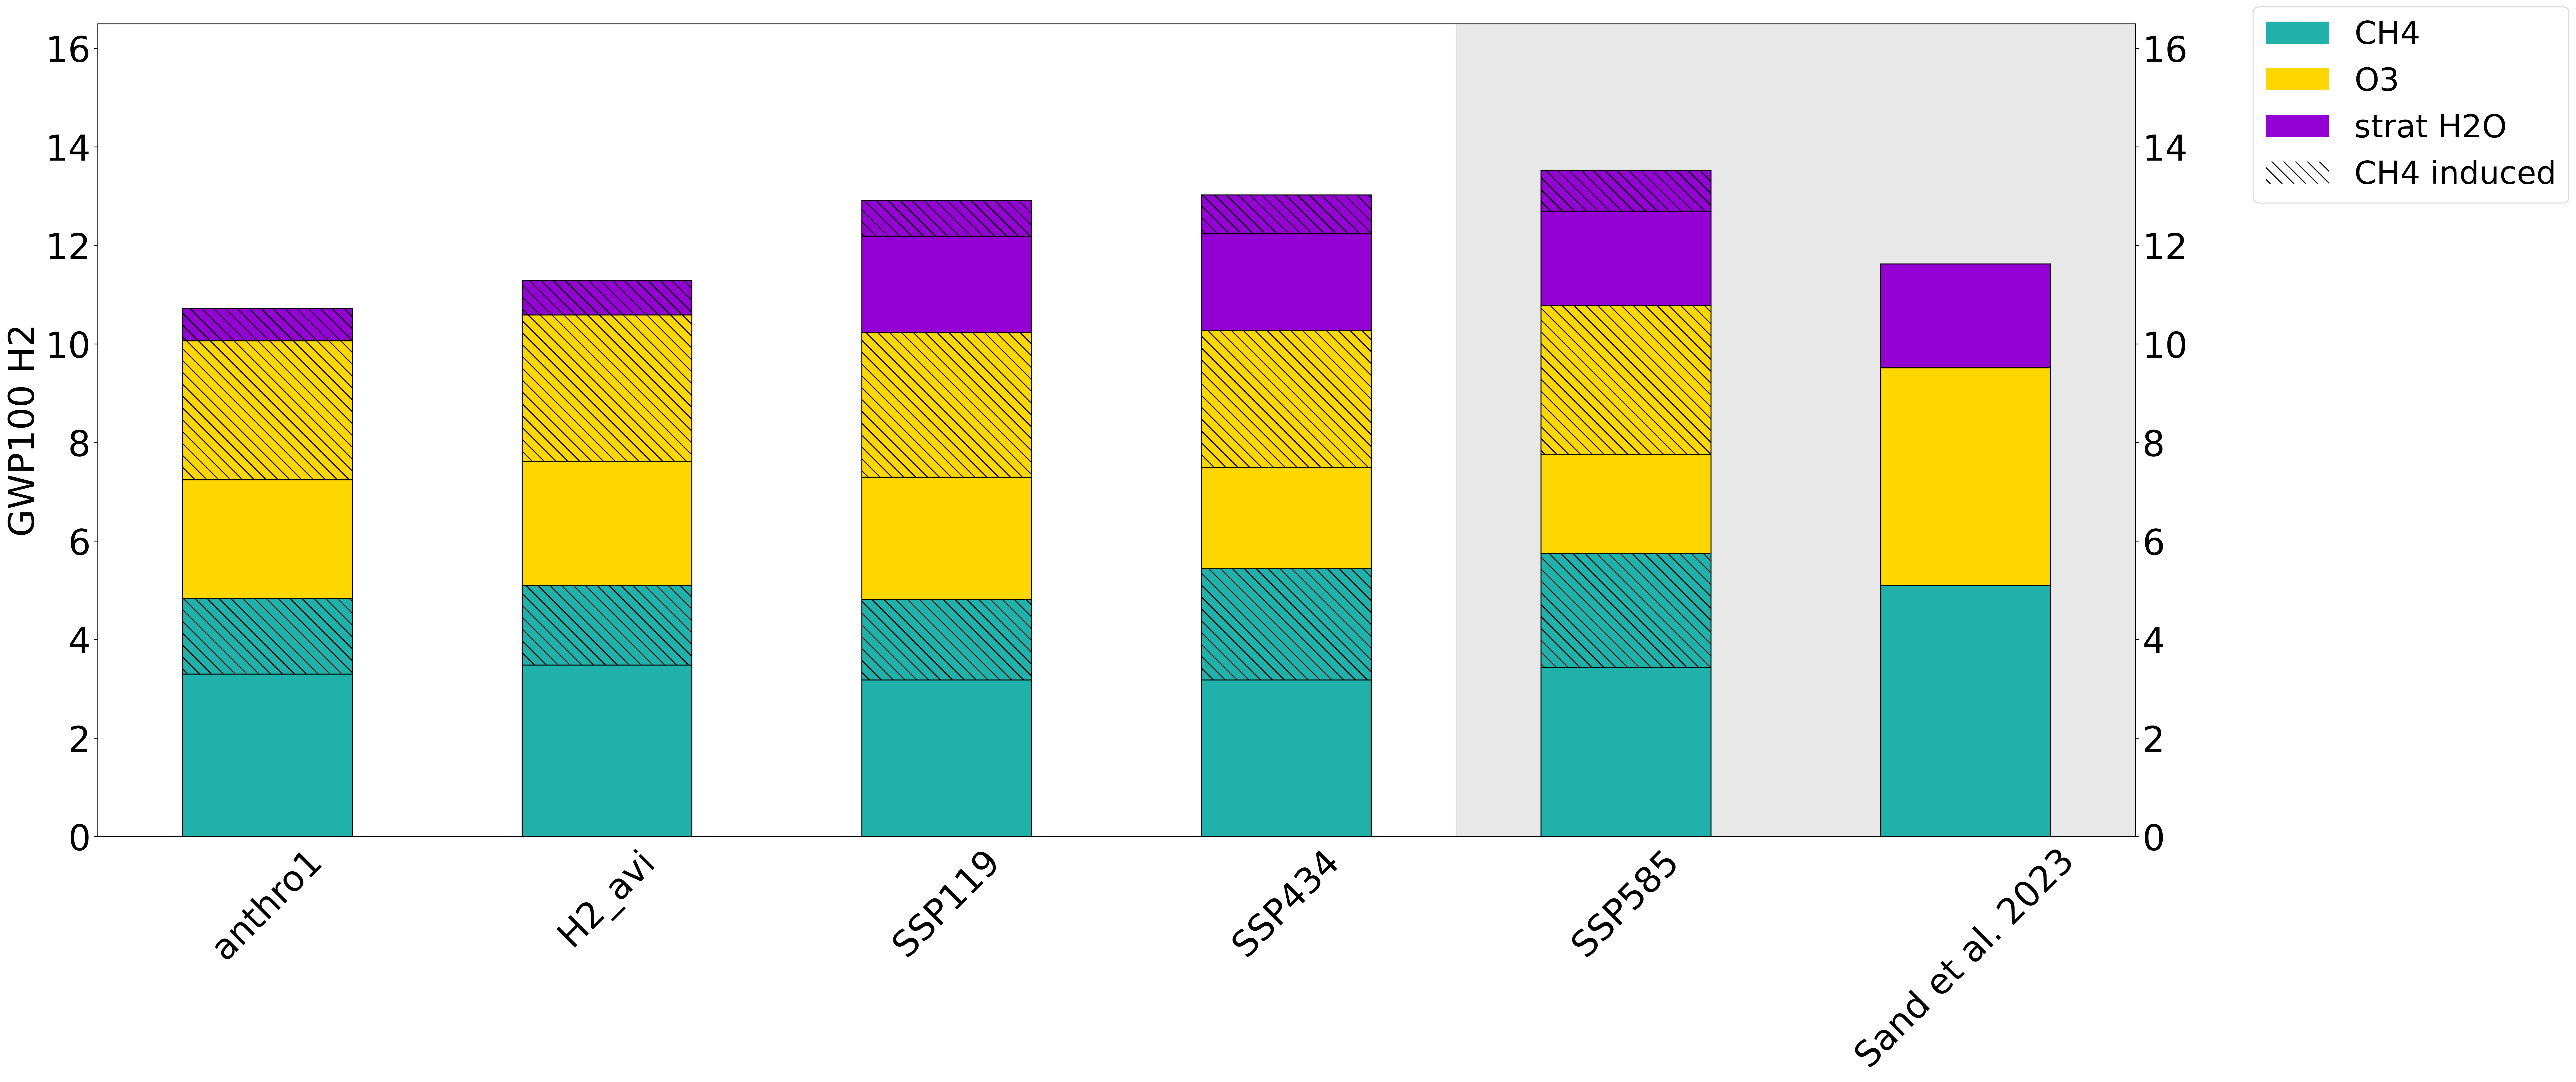

In [29]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(15.5*2,8*2),sharey=True)

df_table_gwp.T.plot.bar(stacked=True,
                        color=[CH4_color,CH4_color,O3_color,O3_color, H2O_color,H2O_color],
                        edgecolor='black',
                        ax=axs, 
                        legend = False) 

bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
i = 0

for b,bar in enumerate(bars):    
    for p,patch in enumerate(bar):
        if b == 1 : 
            patch.set_hatch('\\\\')
        if b == 3 : 
            patch.set_hatch('\\\\')
        if b == 5 : 
            patch.set_hatch('\\\\')
        i = i + 1

axs.set_ylabel('GWP100 H2')
plt.ylim((0,16.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=True,      # ticks along the bottom edge are off
    right=True,         # ticks along the top edge are off
    labelright=True) 


axs.axvspan(3.5, 10.5, alpha=0.5, color='lightgray',zorder=-10)
axs.axvspan(13.5, 15, alpha=0.5, color='lightgray',zorder=-10)


plt.errorbar(14, sand_etal_mm.loc['Sand et al. 2023']['Total'], yerr=2.2446, color='black',capsize=4)

box = axs.get_position()
axs.set_position([box.x0, box.y0, box.width * 0.6, box.height])

# Put a legend to the right of the current axis

axs.legend(loc='center left', bbox_to_anchor=(1.05, 0.90),handles = [CH4_legend, O3_legend,  H2O_legend,CH4ind_legend])  


plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('output/Hydrogen_GWP_detailed.png', transparent=True)

Tekst til manuskript

In [30]:
sand_etal_mm.loc['Sand et al. 2023']['Total'] + 2.2446

np.float64(13.865794154700565)

In [31]:
sand_etal_mm.loc['Sand et al. 2023']['Total'] - 2.2446

np.float64(9.376594154700564)

Table to manuscript:

In [32]:
df_table_gwp.loc['Total'] = df_table_gwp.sum()
df_table_gwp.to_csv('output/gwp_table_to_manuscript_full.csv')

## Methane GWP
The same exercise is repeated for methane GWP. Here we include the AR6 values for methane GWP for comparison.

In [33]:
df_table_gwp = pd.read_csv(filepath+'table_ch4_gwp.csv',index_col=0)
df_table_gwp

,antro1,H2_avi,SSP119,SSP434,SSP585
O3,9.17,9.17,9.92,9.42,9.48
CH4,15.7,15.7,16.3,18.4,18.0
strat H2O,2.14,2.14,2.46,2.66,2.59


In [34]:
#IPCC range from AR6
#Table 7.SM.8 | Estimated uncertainty in the global warming potential (GWP) and global temperature-change potential 
#(GTP) for CH4 showing the total uncertainty as a percentage of the best estimate (expressed as 5–95% confidence interval), 
#and the uncertainty by component of the total emission metric calculation (radiative efficiency, chemistry feedbacks, 
#atmospheric lifetime, CO2 (combined uncertainty in radiative efficiency and CO2 impulse response)), carbon cycle response, 
#fate of oxidized fossil methane, and impulse-response function.

#GWP-100
#Percentage Uncertainty in the Metric Best Estimate Due to
#Radiative Efficiency (%)
re = 20
#Chemical Response (%)
cr = 14
#Lifetime (%) 
lt = 14
#CO2 (%) 
co2 =  26
#Carbon Cycle (%)
cc = 5
#Fossil Fuel Oxidation (%)
fo = 7
#Total Uncertainty (%)
tot = 40

unc = np.array([re,cr,lt,co2,cc])#,fo])
unc_power = np.power(unc,2)
print(unc_power)
unc_power_sum = unc_power.sum()
print(unc_power_sum)
print(np.sqrt(unc_power_sum))
print(tot)

GWP100_AR6 = 29.8
GWP100_AR6_unc = 29.8*tot/100.0


unc = np.array([re,cr,lt])
unc_power = np.power(unc,2)
unc_power_sum = unc_power.sum()

tot_alt = np.sqrt(unc_power_sum)

GWP100_AR6 = 27.0
GWP100_AR6_unc_alt = 27.0*tot_alt/100.0


[400 196 196 676  25]
1493
38.63935817272331
40


In [35]:
df_table_gwp = df_table_gwp[['antro10','SSP119','SSP434','SSP585']]
re_index = {'antro10':'present-day',
            'SSP119':'SSP119',
            'SSP434':'SSP434',
            'SSP585':'SSP585'}

df_table_gwp = df_table_gwp.rename(re_index,axis=1)
df_table_gwp

KeyError: "['antro10'] not in index"

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10*2,8*1.5))
df_table_gwp.T.plot.bar(stacked=True,
                        color=[O3_color, CH4_color, H2O_color],#, H2_color],
                        #color={"O3": 'C1', "CH4": 'C2',"strat H2O":'C4',"H2":'C5'},
                        edgecolor='black',ax=axs) 

#It is the non-fossil GWP that is relevant to compare to.
axs.plot([4.3,4.3],[27.0-11 ,27.0+11 ],linewidth=2,color='gray')
axs.plot([4.5,4.5],[27.0-GWP100_AR6_unc_alt ,27.0+GWP100_AR6_unc_alt ],linewidth=2,color='darkblue')
axs.plot(4.3,27.0,'o',markersize=15,color='gray')
axs.plot(4.5,27.0,'o',markersize=15,color='darkblue')
axs.text(3.4,28.5,'GWP100 \nAR6',color='gray')
axs.text(4.8,27.0,'GWP100 \nAR6 w.o. \nAGWPCO2 \nuncertainty',color='darkblue')
plt.legend(loc='lower right')
plt.xlim([-1,6])
plt.ylabel('GWP100 CH4')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()    
plt.savefig('output/CH4_GWP.png', transparent=True)

IPCC AR6 uncertainty range: 5-95% Table 7.15 for GWP100 non-fossil fuel methane. Uncertainty range Table 7.SM.8, with and without carbon cycle and CO2 uncertainty range.

In [ ]:
df_table_gwp.loc['Total']=df_table_gwp.loc[['O3','CH4','strat H2O']].sum(axis=0)

df_table_gwp.to_csv('output/GWP_methane_to_manuscript.csv')
df_table_gwp

In [ ]:
df_table_gwp.loc['Total'] - df_table_gwp.loc['Total']['present-day']

In [ ]:
(df_table_gwp.loc['Total'] - df_table_gwp.loc['Total']['present-day'])/df_table_gwp.loc['Total']['present-day']*100.0

In [ ]:
[27.0-GWP100_AR6_unc_alt ,27.0+GWP100_AR6_unc_alt ]